In [27]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

# File to Load 

file_to_load = "cardio_train_project_1.csv"

# Read Purchasing File and Store Into Pandas Data Frame

cardio_data = pd.read_csv(file_to_load)

# Test Chart

cardio_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [28]:
# Change Age from Days to Years

age=cardio_data ["age"] / 365
age_rounded=age.apply(np.floor)

# Make a New Column for Age

cardio_data["Age in Years"] = age_rounded

# Drop Column

cardio_data = cardio_data.drop("age", 1)

# Test Chart

cardio_data

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years
0,0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,1,165,64.0,130,70,3,1,0,0,0,1,51.0
3,3,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,1,156,56.0,100,60,1,1,0,0,0,0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,168,76.0,120,80,1,1,1,0,1,0,52.0
69996,99995,1,158,126.0,140,90,2,2,0,0,1,1,61.0
69997,99996,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [29]:
# Convert Height from Centimeters to Feet

height_in_feet=(cardio_data["height"]*.394)/12
cardio_data["height"].apply(np.floor)

# Make a New Column for Height

cardio_data["Height in Feet"] = height_in_feet

# Drop Column

cardio_data = cardio_data.drop("height", 1)

# Test Chart

cardio_data

,id,gender,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet
0,0,2,62.0,110,80,1,1,0,0,1,0,50.0,5.516000
1,1,1,85.0,140,90,3,1,0,0,1,1,55.0,5.122000
2,2,1,64.0,130,70,3,1,0,0,0,1,51.0,5.417500
3,3,2,82.0,150,100,1,1,0,0,1,1,48.0,5.548833
4,4,1,56.0,100,60,1,1,0,0,0,0,47.0,5.122000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,76.0,120,80,1,1,1,0,1,0,52.0,5.516000
69996,99995,1,126.0,140,90,2,2,0,0,1,1,61.0,5.187667
69997,99996,2,105.0,180,90,3,1,0,1,0,1,52.0,6.008500
69998,99998,1,72.0,135,80,1,2,0,0,0,1,61.0,5.351833


In [30]:
# Convert Weight from Kilograms to Pounds

weight = (cardio_data["weight"]* 2.205)
cardio_data["weight"].apply(np.floor)

# Make a New Column for Weight

cardio_data["weight in lbs"] = weight

# Drop Column

cardio_data = cardio_data.drop("weight", 1)

# Test Chart

cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,2,110,80,1,1,0,0,1,0,50.0,5.516000,136.710
1,1,1,140,90,3,1,0,0,1,1,55.0,5.122000,187.425
2,2,1,130,70,3,1,0,0,0,1,51.0,5.417500,141.120
3,3,2,150,100,1,1,0,0,1,1,48.0,5.548833,180.810
4,4,1,100,60,1,1,0,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,2,120,80,1,1,1,0,1,0,52.0,5.516000,167.580
69996,99995,1,140,90,2,2,0,0,1,1,61.0,5.187667,277.830
69997,99996,2,180,90,3,1,0,1,0,1,52.0,6.008500,231.525
69998,99998,1,135,80,1,2,0,0,0,1,61.0,5.351833,158.760


In [31]:
# Clean Up Gender Column

cardio_data['gender'] = cardio_data['gender'].replace(1, "male")
cardio_data['gender'] = cardio_data['gender'].replace(2, "female")

# Test Chart

cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,female,110,80,1,1,0,0,1,0,50.0,5.516000,136.710
1,1,male,140,90,3,1,0,0,1,1,55.0,5.122000,187.425
2,2,male,130,70,3,1,0,0,0,1,51.0,5.417500,141.120
3,3,female,150,100,1,1,0,0,1,1,48.0,5.548833,180.810
4,4,male,100,60,1,1,0,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,1,0,1,0,52.0,5.516000,167.580
69996,99995,male,140,90,2,2,0,0,1,1,61.0,5.187667,277.830
69997,99996,female,180,90,3,1,0,1,0,1,52.0,6.008500,231.525
69998,99998,male,135,80,1,2,0,0,0,1,61.0,5.351833,158.760


In [32]:
# Clean Up Smoke Column

cardio_data['smoke'] = cardio_data['smoke'].replace(0, "Non-Smoker")
cardio_data['smoke'] = cardio_data['smoke'].replace(1, "Smoker")

# Test Chart

cardio_data

,id,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Age in Years,Height in Feet,weight in lbs
0,0,female,110,80,1,1,Non-Smoker,0,1,0,50.0,5.516000,136.710
1,1,male,140,90,3,1,Non-Smoker,0,1,1,55.0,5.122000,187.425
2,2,male,130,70,3,1,Non-Smoker,0,0,1,51.0,5.417500,141.120
3,3,female,150,100,1,1,Non-Smoker,0,1,1,48.0,5.548833,180.810
4,4,male,100,60,1,1,Non-Smoker,0,0,0,47.0,5.122000,123.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,female,120,80,1,1,Smoker,0,1,0,52.0,5.516000,167.580
69996,99995,male,140,90,2,2,Non-Smoker,0,1,1,61.0,5.187667,277.830
69997,99996,female,180,90,3,1,Non-Smoker,1,0,1,52.0,6.008500,231.525
69998,99998,male,135,80,1,2,Non-Smoker,0,0,1,61.0,5.351833,158.760


In [33]:
# Check Total Smokers in Each Category

smoke = cardio_data ["smoke"].value_counts()

# Test Chart

smoke

Non-Smoker    63831
Smoker         6169
Name: smoke, dtype: int64

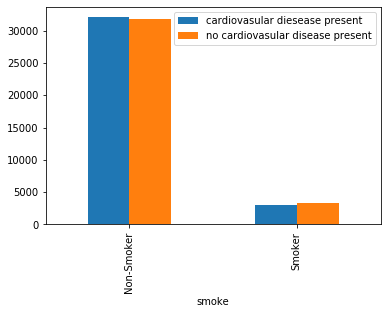

In [34]:
# Set Up Plot

weight_range=cardio_data.groupby(["smoke", "cardio"]).count()["id"]
df=pd.DataFrame(weight_range.reset_index())
df=df.set_index("smoke")
no_cardio_df= df.loc[df ["cardio"] == 0 ]
cardio_df= df.loc[df ["cardio"] == 1 ]
combined_df= pd.DataFrame({
     "cardiovasular diesease present": cardio_df["id"],
     "no cardiovasular disease present": no_cardio_df ["id"]
  })

# Test Plot

combined_df.plot.bar()